In [1]:
import numpy as npp
import minpy.numpy as np
import cPickle
import matplotlib.pyplot as plt
import minpy
minpy.set_global_policy('only_numpy')

from SimplePolicyNetwork import SimplePolicyNetwork
from SimpleRLPolicyGradientSolver import SimpleRLPolicyGradientSolver
from simpleBox import simpleBox
from SimRat import SimRat
from dataProcessFunctions import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
weight_file = "good_weights/good_weights"
loaded_params = load_weights(weight_file+"4.pkl")

VirtualRat0
Episode 300 complete (0.01s), loss: 1.86745754358, reward: 5, running reward: 2.96355377524
Episode 300 complete (0.01s), loss: -2.48188217616, reward: -3, running reward: 0.590609429127
Episode 600 complete (0.01s), loss: -0.0907391806213, reward: -3, running reward: -0.354200915596
Episode 900 complete (0.01s), loss: -0.0573288338973, reward: -3, running reward: -0.372580778472
Episode 1200 complete (0.01s), loss: -0.120884269598, reward: -3, running reward: -0.35910192565
Episode 1500 complete (0.01s), loss: -0.141851378041, reward: -3, running reward: -0.357492401965
Episode 1800 complete (0.01s), loss: -1.36018247692, reward: -3, running reward: -0.331462719343
Episode 2100 complete (0.01s), loss: 6.2455391329, reward: 1, running reward: 1.5696573389
Episode 2400 complete (0.01s), loss: 1.37017359758, reward: 3, running reward: 3.285770327
Episode 2700 complete (0.01s), loss: 0.716873589202, reward: 5, running reward: 3.56321818565
Episode 3000 complete (0.01s), loss: 

/usr/local/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python2.7/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


VirtualRat1
Episode 300 complete (0.01s), loss: 1.59538712619, reward: 5, running reward: 3.56030503394
Episode 300 complete (0.01s), loss: 5.67583731655, reward: 3, running reward: 1.35716194036
Episode 600 complete (0.01s), loss: 20.7190110748, reward: 3, running reward: 3.54421712023
Episode 900 complete (0.01s), loss: 7.2519104743, reward: 5, running reward: 4.26904204699
Episode 1200 complete (0.01s), loss: 1.11176744758, reward: 5, running reward: 4.65208850017
Episode 1500 complete (0.01s), loss: 0.959046632017, reward: 5, running reward: 4.79930377302
Episode 1800 complete (0.01s), loss: 0.803914074615, reward: 5, running reward: 4.79481973196
Episode 2100 complete (0.01s), loss: 1.20596329652, reward: 3, running reward: 4.34620071402
Episode 2400 complete (0.01s), loss: 0.703004425122, reward: 5, running reward: 4.3398884269
Episode 2700 complete (0.01s), loss: 0.569600197775, reward: 5, running reward: 4.16065426949
Episode 3000 complete (0.01s), loss: 0.920788224507, reward:

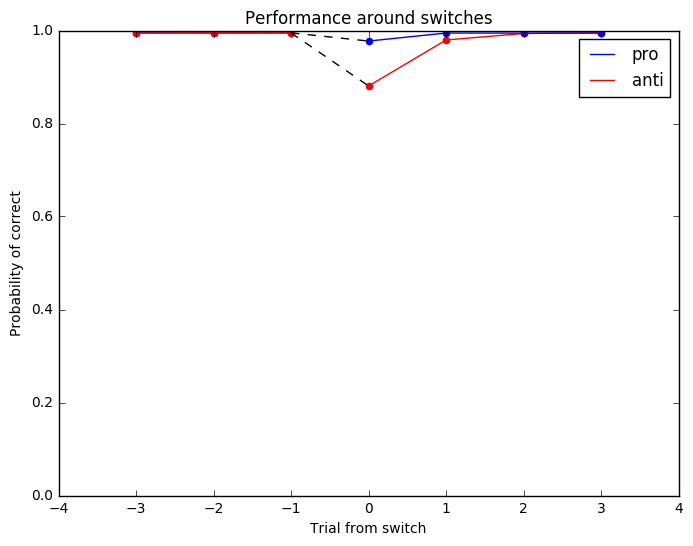

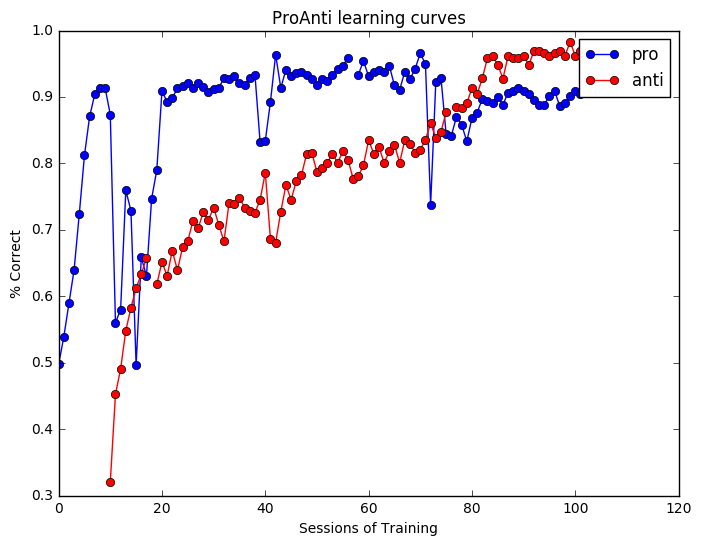

In [3]:
box = simpleBox(mode="alternative",length=1000,block_size=30,random_range=0,trial_per_episode=5, repeat = True)
val_X, val_y = box.X,box.y
rats = {}
for i in range(5):
    ratname = 'VirtualRat'+str(i)
    print ratname
    model = SimplePolicyNetwork(hidden_dim=5,reg=0, noise_factor = 0)
    rat = SimRat(model)
    box = simpleBox(mode="pro_only",length=150,block_size=30,random_range=0,
                    trial_per_episode=5, repeat = False, reward_ratio = 1)
    solver = SimpleRLPolicyGradientSolver(model, box,
                                        update_rule='adam',
                                        optim_config={
                                            'learning_rate': 0.01,
                                            'decay_rate': 1
                                        },
                                        init_rule='xavier',
                                        num_episodes=301,
                                        verbose=False,
                                        supervised = False,
                                        print_every=300)
    solver.load_params(loaded_params)
    solver.train()

    #box.change_mode("anti_only")
    #solver.change_settings(learning_rate=0.01,num_episodes=2000)
    #solver.train()

    box.change_mode("alternative")
    solver.change_settings(learning_rate=0.01,num_episodes=3001)
    solver.train()
    
    probs = rat.predict(val_X,val_y)
    
    rats[ratname] = rat
    rat.addHistory(box.output_history())
    rat.computeLearningCurve()
    
trial_window = 3
p2a_mean, a2p_mean = meanPerformance(rats, trial_window = 3)
np.set_printoptions(precision=2)
plt.ylim([0,1])
draw_3d(p2a_mean, a2p_mean, trial_window = 3)
pro_mean, anti_mean = meanLearningCurve(rats)
learningCurve(pro_mean,anti_mean, rats)

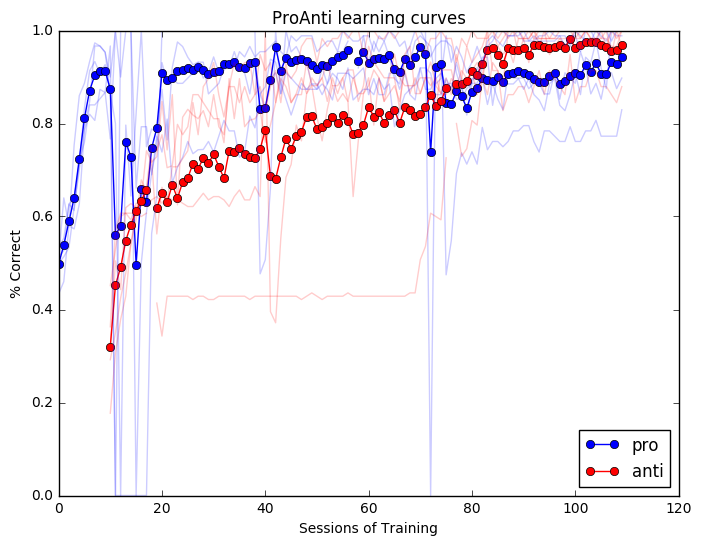

In [5]:
learningCurve(pro_mean,anti_mean, rats)